# Iris Flower Classification
# Data Science and Analytics
# Name:- Abhishek Ramesh Pawar
# LGMVIP-DataScience Intern

In [3]:
#importing important libraries related to data manipulation and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

## Loading Dataset


In [4]:
iris = pd.read_csv("C:/Users/ap585/Downloads/iris.data")


In [6]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [7]:
iris=pd.read_csv("C:/Users/ap585/Downloads/iris.data", header= None)

In [8]:
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
iris.shape

(150, 5)

In [10]:
#use info() method of iris to get more information.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
#find missing values 
iris.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [12]:
#Describe the iris using describe() command
iris.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
#Now rename the column name for further process
iris0 = iris.rename(columns = {0 : 'SepalLength'}, inplace = True)
iris1 = iris.rename(columns = {1 : 'SepalWidth'}, inplace = True)
iris2 = iris.rename(columns = {2 : 'PetalLength'}, inplace = True)
iris3 = iris.rename(columns = {3 : 'PetalWidth'}, inplace = True)
iris4 = iris.rename(columns = {4 : 'Species'}, inplace = True)

In [14]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


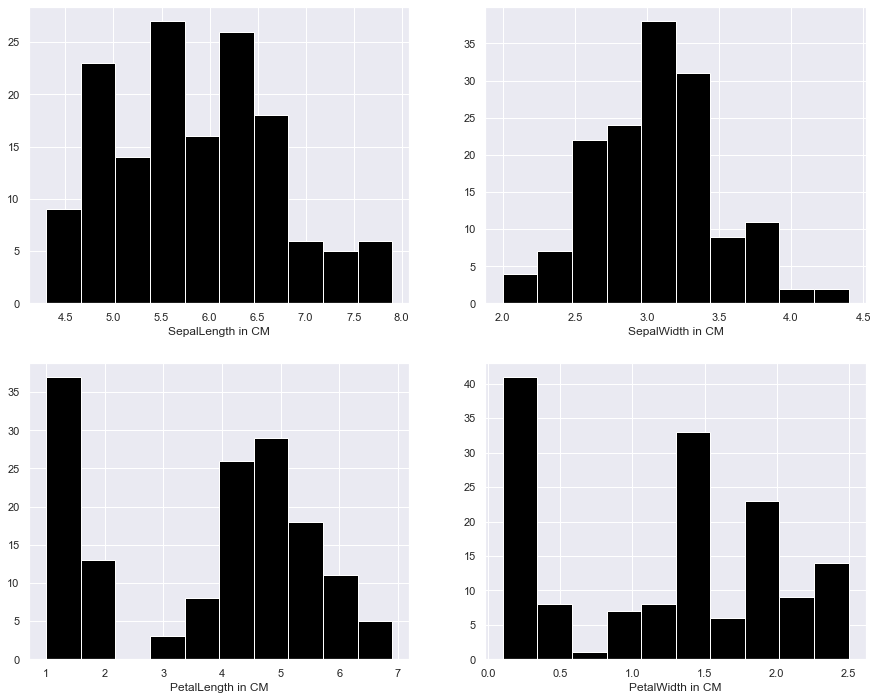

In [15]:
#plot the figure

fig = plt.figure()


ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


#Color of sepallength and x axis value
ax1.hist(iris['SepalLength'], color = "black")
ax1.set_xlabel('SepalLength in CM')

#Color of SepalWidth and x axis value
ax2.hist(iris['SepalWidth'], color = "black")
ax2.set_xlabel('SepalWidth in CM')

#Color of PetalLength and x axis value
ax3.hist(iris['PetalLength'], color = "black")
ax3.set_xlabel('PetalLength in CM')

#Color of PetalWidth and x axis value
ax4.hist(iris['PetalWidth'], color = "black")
ax4.set_xlabel('PetalWidth in CM')

fig.set_figheight(12)
fig.set_figwidth(15)

#plot and show the graph
plt.show()

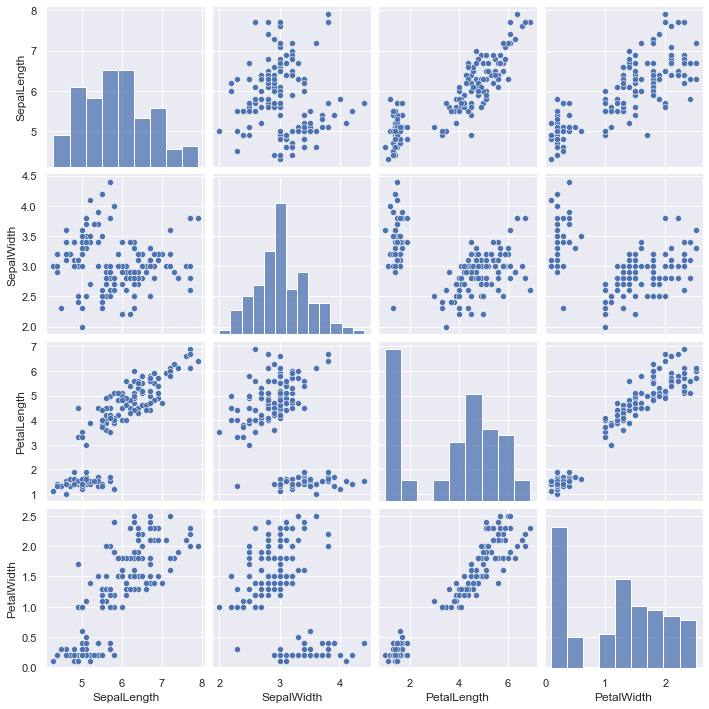

In [16]:
sns.pairplot(data=iris,kind= 'scatter')

### Now plot the Relation Matrix using command plt.show()


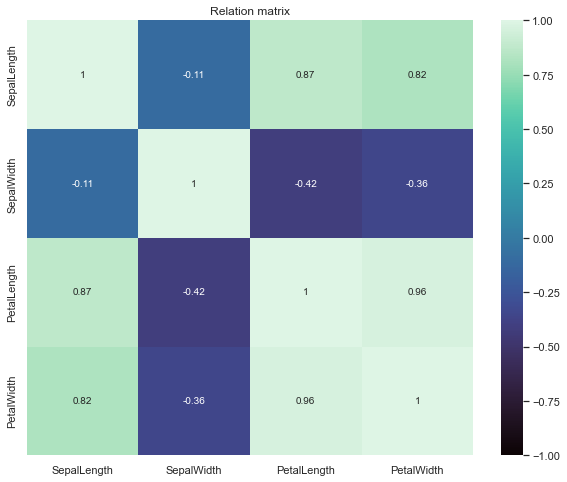

In [17]:
corr = iris.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, vmin = -1.0, cmap = 'mako')
plt.title('Relation matrix')
plt.show()

### Blue shows Iris-setosa
### Orange shows Iris-versicolor
### Green shows Iris-virginica for Species

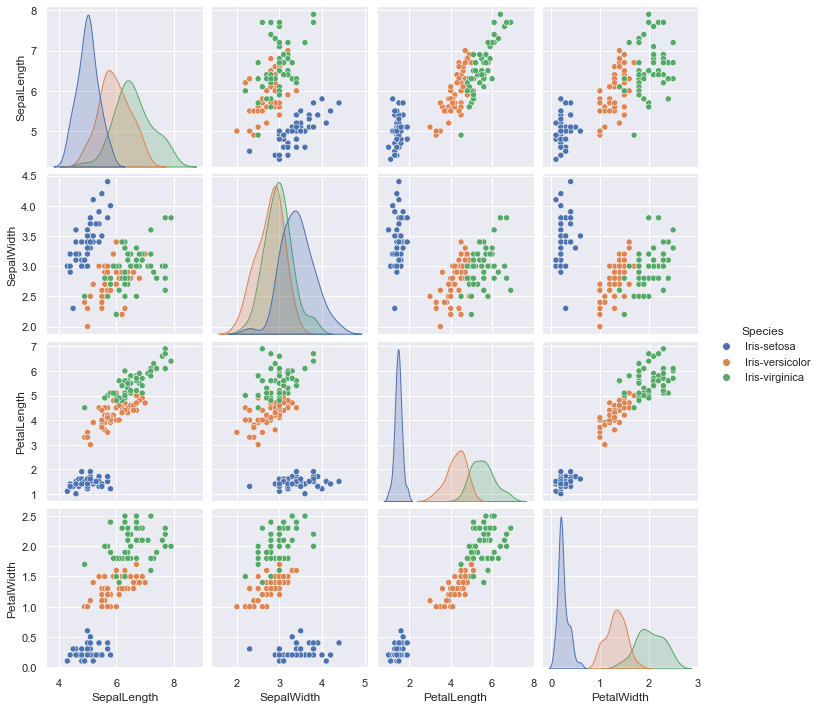

In [18]:
sns.pairplot(data=iris,hue='Species')

In [19]:
from sklearn.cluster import KMeans
LIST= []
x = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].to_numpy()
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    LIST.append(kmeans.inertia_)

### from above graph we can see that the graph have an elbow shape at 3 which means the k value that should be choosen is 3. It also known that the optimum cluster occcur at the elbow curve.

In [20]:
kmeans = KMeans(n_clusters = 3, init= 'k-means++',
               max_iter = 300, n_init =10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising the clusters - On first two columns 

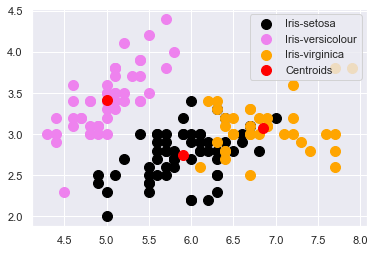

In [21]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1],
           s = 100, c = 'black', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1],
           s = 100, c = 'violet', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],
           s = 100, c = 'orange', label = 'Iris-virginica')


#plotting the centroids of the cluster

plt.scatter (kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
             s = 100, c = 'red', label = 'Centroids')


#for plot the whole cluster give command as plt.legend()

plt.legend()

# Thank you!